In [29]:
import numpy as np
import pandas as pd
import quandl
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
## scrape the stock data

raw_data = quandl.get('WIKI/FB')
df_copy = raw_data.copy()

In [3]:
df_copy.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2012-05-18,42.05,45.00,38.00,38.2318,573576400.0,0.0,1.0,42.05,45.00,38.00,38.2318,573576400.0
2012-05-21,36.53,36.66,33.00,34.0300,168192700.0,0.0,1.0,36.53,36.66,33.00,34.0300,168192700.0
2012-05-22,32.61,33.59,30.94,31.0000,101786600.0,0.0,1.0,32.61,33.59,30.94,31.0000,101786600.0
2012-05-23,31.37,32.50,31.36,32.0000,73600000.0,0.0,1.0,31.37,32.50,31.36,32.0000,73600000.0
2012-05-24,32.95,33.21,31.77,33.0300,50237200.0,0.0,1.0,32.95,33.21,31.77,33.0300,50237200.0


In [5]:
# we are using adj. close as features

df = df_copy[['Adj. Close']]

In [10]:
df.isnull().sum() # seems like no missing values

Adj. Close    0
dtype: int64

In [13]:
## say we want o predict x-days in to the future
future_out = 30

## this is out Target column shifted x units up
df['Prediction'] = df['Adj. Close'].shift(-future_out)


<ipython-input-13-00e10bbfef5c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction'] = df['Adj. Close'].shift(-future_out)


In [15]:
df.tail()

,Adj. Close,Prediction
Date,,
2018-03-21,169.39,NaN
2018-03-22,164.89,NaN
2018-03-23,159.39,NaN
2018-03-26,160.06,NaN
2018-03-27,152.19,NaN


In [17]:
## create an independent dataset -- create nd-array 

X = np.array(df.drop(['Prediction'],axis=1))

## and remove the last x datasets for wich the prediciton had nan VALUES

X = X[:-future_out]


In [18]:
## make an np-aray of dependent variabele y

y = np.array(df['Prediction'])
y = y[:-future_out]

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=21)

In [20]:
## train Support Vector Regressor

svr_rdf = SVR(kernel='rbf',C=1e3, gamma=0.1)
svr_rdf.fit(X_train,y_train)


SVR(C=1000.0, gamma=0.1)

In [22]:
## testing the model: score returns the coeff of determination  R^2 of the prediction
## best possible score is 1.0

svm_confidence = svr_rdf.score(X_test,y_test)
print('svm confidence:',svm_confidence)

svm confidence: 0.9858701650539408


In [24]:
## crete and train linear regression model
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_confidence = lr.score(X_test,y_test)
print('linear regression confidence:',lr_confidence)

linear regression confidence: 0.9821885658820371


In [25]:
## let us see how well the model performed using the value

In [26]:
# actual value of the last 3o days
X_forecast = np.array(df.drop(['Prediction'],1))[-future_out:]

In [27]:
## prediction using linear regression

lr_prediciton= lr.predict(X_forecast)

## prediction using support vector regression

svr_prediciton= svr_rdf.predict(X_forecast)

In [86]:
df_predict = pd.DataFrame(df['Prediction'])

In [88]:
df_svr_pred = pd.DataFrame(svr_prediciton,index=df[-future_out:].index)

In [81]:
df_lr_pred = pd.DataFrame(lr_prediciton,index=df[-future_out:].index)

,Prediction,0
Date,,
2012-05-18,30.771,NaN
2012-05-21,31.200,NaN
2012-05-22,31.470,NaN
2012-05-23,31.730,NaN
2012-05-24,32.170,NaN
...,...,...
2018-03-21,NaN,173.041474
2018-03-22,NaN,168.509624
2018-03-23,NaN,162.970696


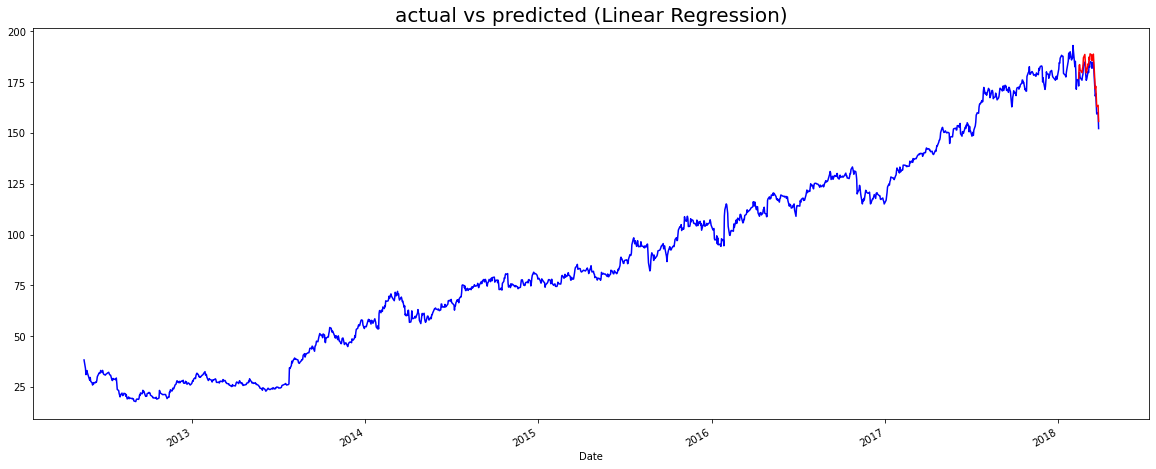

In [90]:
## plotting the data
df['Adj. Close'].plot(figsize=(20,8),color='blue')
plt.plot(df_lr_pred,color='red')
plt.title('actual vs predicted (Linear Regression)',size=20)
plt.show()

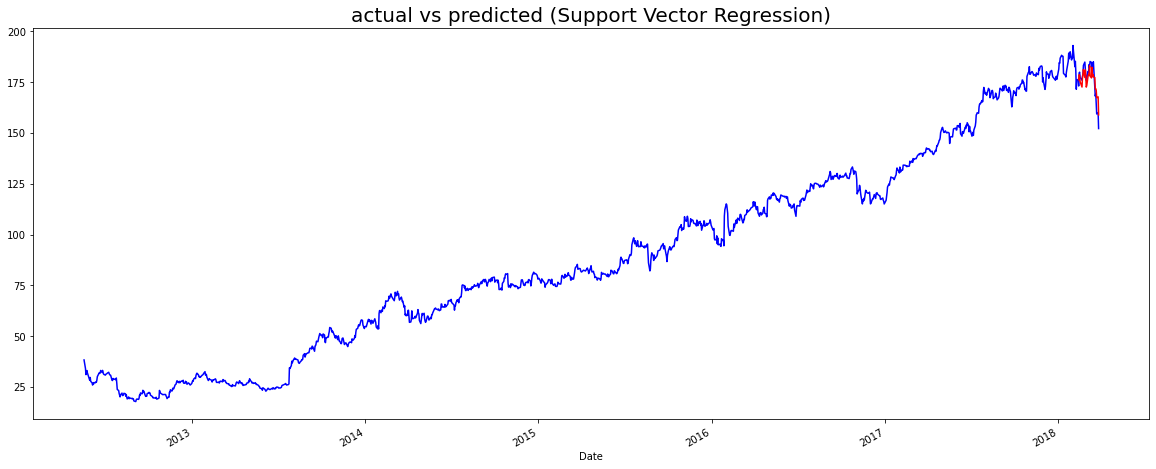

In [91]:
## plotting the data
df['Adj. Close'].plot(figsize=(20,8),color='blue')
plt.plot(df_svr_pred,color='red')
plt.title('actual vs predicted (Support Vector Regression)',size=20)
plt.show()